In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
%matplotlib inline

import tensorflow as tf

In [2]:
#Load Iris Dataset 
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
print(X.shape, y.shape)  #4 features
#Scale the data
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

(150, 4) (150,)


In [3]:
pd.DataFrame(iris.data,columns = iris.feature_names).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
def plot3clusters(X, title, vtitle):
  plt.figure()
  colors = ['navy', 'turquoise', 'darkorange']
  lw = 2

  for color, i, target_name in zip(colors, [0, 1, 2], target_names):
      plt.scatter(X[y == i, 0], X[y == i, 1], color=color, alpha=1., lw=lw,
                  label=target_name)
  plt.legend(loc='best', shadow=False, scatterpoints=1)
  plt.title(title)  
  plt.xlabel(vtitle + "1")
  plt.ylabel(vtitle + "2")
  plt.show()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense (Dense)                (None, 2)                 10        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 12        
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________
None


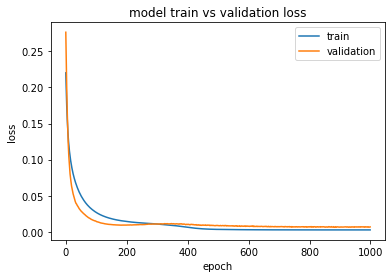

In [5]:
### edTest(test_check_ae) ###
#create an AE and fit it with our data using 2 neurons in the dense layer using keras' functional API
input_dim = X_scaled.shape[1]
encoding_dim = 2  

input_features = tf.keras.Input(shape=(input_dim,))
encoded = tf.keras.layers.Dense(encoding_dim, activation=None)(input_features)
decoded = tf.keras.layers.Dense(input_dim, activation=None)(encoded)

#create autoencoder model which has input as input_features and outputs decoded
#autoencoder = _____________
autoencoder = tf.keras.Model(inputs=input_features, outputs=decoded)


autoencoder.compile(optimizer='adam', loss='mse')
print(autoencoder.summary())

#Notice the y in .fit() below - This takes a minute to run (output suppressed)
history = autoencoder.fit(X_scaled, X_scaled,
                epochs=1000,
                batch_size=16,
                shuffle=True,
                validation_split=0.1,
                verbose = 0)

#plot our loss 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()



(150, 4)


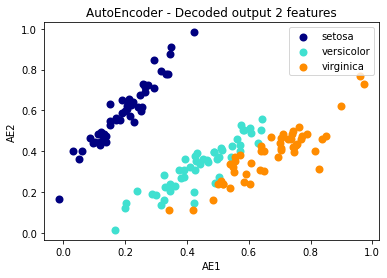

In [6]:
preds = autoencoder.predict(X_scaled)
print(preds.shape)
plot3clusters(preds[:,:2], 'AutoEncoder - Decoded output 2 features', 'AE') 


(150, 2)


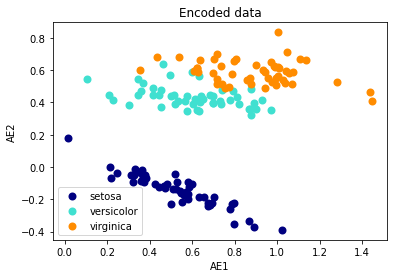

In [7]:
# use our encoded layer to encode the training input
encoder = tf.keras.Model(input_features, encoded)
encoded_data = encoder.predict(X_scaled)
print(encoded_data.shape)
plot3clusters(encoded_data, 'Encoded data', 'AE')  